In [1]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("data/BBC News Train.csv")

In [4]:
test = pd.read_csv('data/BBC News Test.csv')

In [5]:
train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [6]:
test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [9]:
train["Category"].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

C:\Users\umang\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

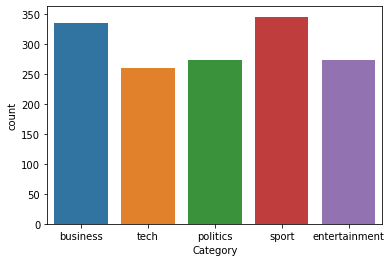

In [10]:
sns.countplot(train["Category"])

In [11]:
train[["Text","Category"]].groupby("Category").count()

,Text
Category,
business,336
entertainment,273
politics,274
sport,346
tech,261


In [12]:
train["length"] = train["Text"].apply(len)

In [13]:
train

,ArticleId,Text,Category,length
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866
1,154,german business confidence slides german busin...,business,2016
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104
3,1976,lifestyle governs mobile choice faster bett...,tech,3618
4,917,enron bosses in $168m payout eighteen former e...,business,2190
...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,1266
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,3111
1487,1590,weak dollar hits reuters revenues at media gro...,business,1370
1488,1587,apple ipod family expands market apple has exp...,tech,3242


In [14]:
train["Category"].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

### Character count

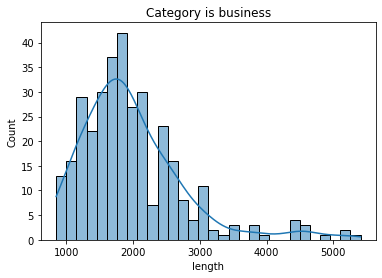

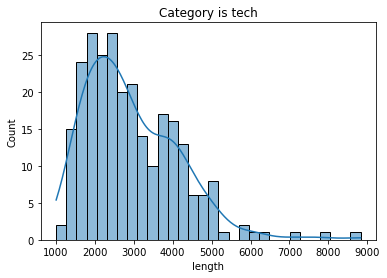

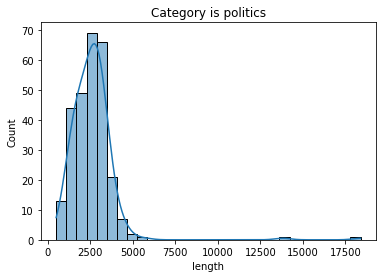

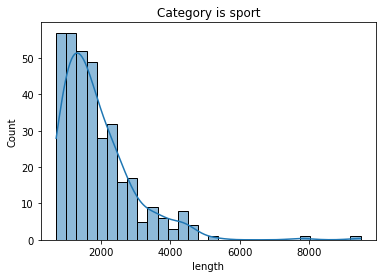

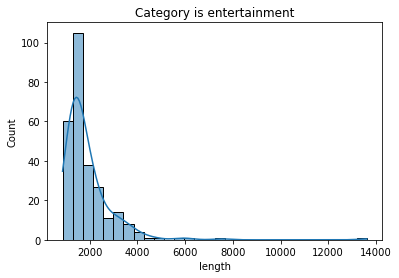

In [15]:
for i in ['business', 'tech', 'politics', 'sport', 'entertainment']:
    sns.histplot(train[train["Category"] == i]["length"],bins = 30, kde=True).set(title = f"Category is {i}")
    plt.show()

In [16]:
import nltk
from nltk.corpus import stopwords

In [17]:
from nltk.stem import PorterStemmer

In [18]:
def process_tweet(Text):
    Text = nltk.word_tokenize(Text)
    stemmer = PorterStemmer()
    stem = [stemmer.stem(word) for word in Text]
    words = [word for word in stem if word not in stopwords.words('english')]
    Text = " ".join(words)
    
    return Text

train["Clean_Text"] = train["Text"].apply(process_tweet)
train.head()

,ArticleId,Text,Category,length,Clean_Text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom ex-boss launch defenc lawyer defend f...
1,154,german business confidence slides german busin...,business,2016,german busi confid slide german busi confid fe...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indic econom gloom citizen major nati...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyl govern mobil choic faster better funk...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron boss $ 168m payout eighteen former enron...


In [19]:
def process_tweet(Text):
    Text = nltk.word_tokenize(Text)
    stemmer = PorterStemmer()
    stem = [stemmer.stem(word) for word in Text]
    words = [word for word in stem if word not in stopwords.words('english')]
    Text = " ".join(words)
    
    return Text

test["Clean_Text"] = test["Text"].apply(process_tweet)
test.head()

,ArticleId,Text,Clean_Text
0,1018,qpr keeper day heads for preston queens park r...,qpr keeper day head preston queen park ranger ...
1,1319,software watching while you work software that...,softwar watch work softwar onli monitor everi ...
2,1138,d arcy injury adds to ireland woe gordon d arc...,arci injuri add ireland woe gordon arci ha rul...
3,459,india s reliance family feud heats up the ongo...,india relianc famili feud heat ongo public spa...
4,1020,boro suffer morrison injury blow middlesbrough...,boro suffer morrison injuri blow middlesbrough...


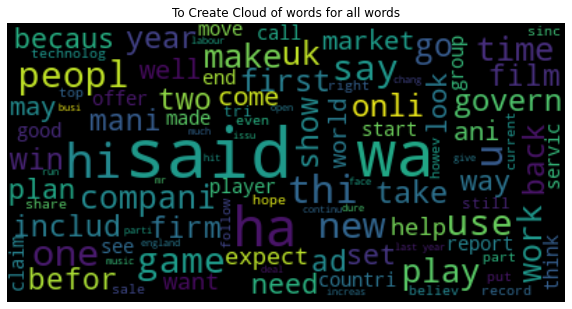

In [20]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in train.Clean_Text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
fig = plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("To Create Cloud of words for all words")
plt.show()

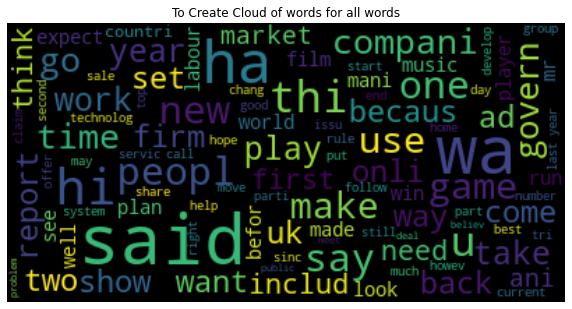

In [21]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(review for review in test.Clean_Text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
fig = plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("To Create Cloud of words for all words")
plt.show()

In [22]:
vectorizer = TfidfVectorizer(use_idf=True)
X = vectorizer.fit_transform(train["Clean_Text"])

<IPython.core.display.Javascript object>

In [23]:

# v = TfidfVectorizer(use_idf = True)
X_ = vectorizer.transform(test["Clean_Text"])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,train["Category"],test_size = 0.2,random_state = 42)

In [26]:
x_train = X_train.toarray()
x_test = X_test.toarray()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score


clf_A = AdaBoostClassifier()
clf_D = LogisticRegression()
clf_B = MultinomialNB()
clf_C = GaussianNB()
clfs = [clf_A,clf_B,clf_C,clf_D]

In [28]:
df_score = pd.DataFrame(index=None, columns=['model','recall_score','precision_score','f1_score','accuracy-score'])
for clf in clfs:
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    score1 = recall_score(y_test,pred,average='macro')
    score2 = precision_score(y_test,pred,average='macro')
    score3 = f1_score(y_test,pred,average='macro')
    acuracy_score = accuracy_score(y_test,pred)
  
    df_score = df_score.append(pd.Series({
                "model" : clf.__class__.__name__,
                "recall_score" : score1,
                "precision_score" : score2,
                "f1_score" : score3,
                "accuracy-score" : acuracy_score}),ignore_index = True)

df_score

,model,recall_score,precision_score,f1_score,accuracy-score
0,AdaBoostClassifier,0.728571,0.768482,0.733831,0.728188
1,MultinomialNB,0.957234,0.963947,0.959694,0.959732
2,GaussianNB,0.905729,0.908562,0.906972,0.909396
3,LogisticRegression,0.958792,0.960333,0.959202,0.959732


In [29]:
X.shape

(1490, 17577)

In [30]:
X_.shape

(735, 17577)

In [31]:
clf_B.predict(X_)

array(['sport', 'tech', 'sport', 'business', 'sport', 'sport', 'politics',
       'politics', 'entertainment', 'business', 'business', 'tech',
       'politics', 'tech', 'entertainment', 'sport', 'politics', 'tech',
       'entertainment', 'politics', 'business', 'politics', 'sport',
       'business', 'politics', 'sport', 'business', 'sport', 'sport',
       'business', 'politics', 'tech', 'business', 'business', 'sport',
       'sport', 'sport', 'business', 'entertainment', 'business',
       'politics', 'politics', 'entertainment', 'tech', 'sport', 'tech',
       'entertainment', 'business', 'politics', 'business', 'politics',
       'business', 'business', 'business', 'tech', 'politics', 'tech',
       'entertainment', 'sport', 'tech', 'sport', 'entertainment', 'tech',
       'politics', 'business', 'entertainment', 'sport', 'tech', 'sport',
       'sport', 'tech', 'sport', 'business', 'politics', 'tech', 'sport',
       'tech', 'tech', 'tech', 'entertainment', 'politics', 'sport',

In [32]:
with open('model.pkl', 'wb') as fid:
    pickle.dump(clf_B, fid)

<IPython.core.display.Javascript object>

In [33]:

pickle.dump(vectorizer, open('transform.pkl', 'wb'))

<IPython.core.display.Javascript object>